In [1]:
import pandas as pd
import os
import numpy as np

THRESHOLD = 2
ROWS = 0
COLUMNS = 1

# depending on the OS the path to the data file is different
if os.name == 'nt':
    data = pd.read_excel(r'..\data\nutrient-file-release2-jan22.xlsx', sheet_name='All solids & liquids per 100g')
elif os.name == 'posix':
    data = pd.read_excel(r'../data/nutrient-file-release2-jan22.xlsx', sheet_name='All solids & liquids per 100g')

# replace 0 with NaN
data = data.replace({0: np.nan})
    
# get the list of row/column names before dropping
before_rows = data.values.tolist()
before_cols = data.columns.tolist()

# remove rows/columns with less than (THRESHOLD) non-null values
data = data.dropna(thresh=THRESHOLD, axis=COLUMNS)
data = data.dropna(thresh=THRESHOLD, axis=ROWS)

# get the list of row/column names after dropping
after_rows = data.values.tolist()
after_cols = data.columns.tolist()

# find the removed rows/columns
removed_rows = [row for row in before_rows if row not in after_rows]
removed_cols = [col for col in before_cols if col not in after_cols]

# print the removed rows/columns
print("Removed" , len(removed_rows), "rows")
print("Removed" , len(removed_cols), "columns")

Removed 1616 rows
Removed 48 columns


## $k$-NN

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# split data into train and test sets
train, test = train_test_split(data, test_size=0.2)

In [4]:
# use nutrition columns as features
X_COLS = list(data.columns[3:])

# use classification column as target
y_COL = data.columns[1]

print(f"X_COLS: {X_COLS}")
print(f"y_COL: {y_COL}")

X_COLS: ['Energy with dietary fibre, equated \n(kJ)', 'Energy, without dietary fibre, equated \n(kJ)', 'Moisture (water) \n(g)', 'Protein \n(g)', 'Nitrogen \n(g)', 'Fat, total \n(g)', 'Ash \n(g)', 'Total dietary fibre \n(g)', 'Alcohol \n(g)', 'Fructose \n(g)', 'Glucose \n(g)', 'Sucrose\n(g)', 'Maltose \n(g)', 'Lactose \n(g)', 'Galactose \n(g)', 'Maltotrios \n(g)', 'Total sugars (g)', 'Added sugars (g)', 'Free sugars \n(g)', 'Starch \n(g)', 'Dextrin \n(g)', 'Glycogen \n(g)', 'Inulin \n(g)', 'Mannitol \n(g)', 'Maltodextrin (g)', 'Raffinose \n(g)', 'Stachyose \n(g)', 'Sorbitol \n(g)', 'Resistant starch \n(g)', 'Available carbohydrate, without sugar alcohols \n(g)', 'Available carbohydrate, with sugar alcohols \n(g)', 'Acetic acid \n(g)', 'Citric acid \n(g)', 'Lactic acid \n(g)', 'Malic acid\n (g)', 'Oxalic acid \n(g)', 'Propionic acid \n(g)', 'Quinic acid \n(g)', 'Succinic acid \n(g)', 'Tartaric acid \n(g)', 'Aluminium (Al) \n(ug)', 'Antimony (Sb) \n(ug)', 'Arsenic (As) \n(ug)', 'Cadmium 

In [5]:
# create design matrix X and predictions y
X_train = train[X_COLS]
y_train = train[y_COL]
X_test = test[X_COLS]
y_test = test[y_COL]

# sample some rows of training set and their labels
print(f"X_train: {X_train.head()}")
print("Labels:", y_train.iloc[:5].reset_index(drop=True).values)

# sample some rows of test set and their labels
print(f"X_test: {X_test.head()}")
print("Labels:", y_test.iloc[:5].reset_index(drop=True).values)

X_train:       Energy with dietary fibre, equated \n(kJ)   
1009                                     2629.0  \
374                                      1047.0   
168                                      1173.0   
817                                       681.0   
1538                                      278.0   

      Energy, without dietary fibre, equated \n(kJ)  Moisture (water) \n(g)   
1009                                         2629.0                    26.1  \
374                                          1025.0                    50.4   
168                                          1154.0                    34.4   
817                                           681.0                    70.2   
1538                                          261.0                    81.9   

      Protein \n(g)  Nitrogen \n(g)  Fat, total \n(g)  Ash \n(g)   
1009            8.8            1.41              67.0        0.4  \
374             7.5            1.20              11.7        2.5   
168  

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# create knn with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# replace NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

# train the model using the training set
knn.fit(X_train, y_train)

C:\Users\willi\AppData\Local\Temp\ipykernel_15784\2454431819.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(0, inplace=True)
C:\Users\willi\AppData\Local\Temp\ipykernel_15784\2454431819.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(0, inplace=True)


KNeighborsClassifier(n_neighbors=3)

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# predict the labels of the test set
y_pred = knn.predict(X_test)

# print the predictions
print(f"First 5 predictions: {y_pred[:5]}")

First 5 predictions: [24702. 12102. 12101. 18104. 18103.]


In [8]:
# check the accuracy
from sklearn.metrics import accuracy_score

# y_test constains the true labels of the test set
# y_pred contains the predicted labels of the test set
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.42901234567901236


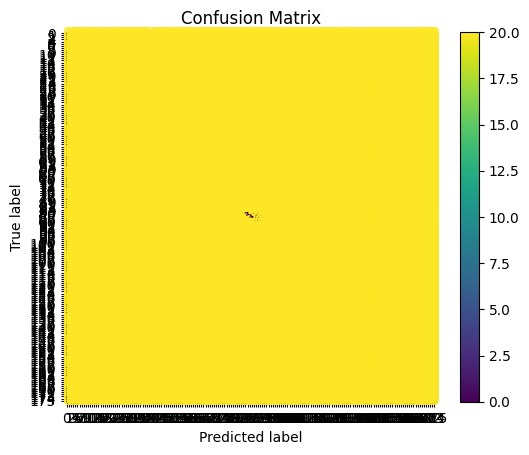

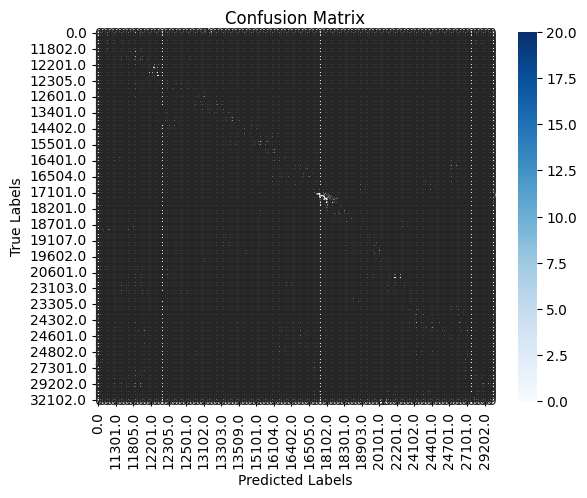

In [9]:
# show confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create a confusion matrix using crosstab
cm2 = pd.crosstab(y_test, y_pred)
#print(cm2)

# create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)

# plot confusion matrix
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# plot the confusion matrix using seaborn
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# both these plots are cursed mfs

# Linear Regression

In [10]:
import random
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
train, test = train_test_split(data, test_size=0.2)

# sample some rows of training set
X_train.sample(10)

,"Energy with dietary fibre, equated \n(kJ)","Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),Alcohol \n(g),Fructose \n(g),...,Leucine \n(mg),Lysine \n(mg),Methionine \n(mg),Phenylalanine \n(mg),Proline \n(mg),Serine \n(mg),Threonine \n(mg),Tyrosine \n(mg),Tryptophan \n(mg),Valine \n(mg)
1549,189.0,174.0,85.0,2.1,0.34,0.6,0.7,1.8,0.0,0.3,...,131.0,100.0,36.0,80.0,36.0,96.0,75.0,76.0,24.0,98.0
371,1179.0,1155.0,44.4,9.7,1.55,14.3,2.4,3.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.0,0.0
1585,84.0,80.0,93.7,2.2,0.35,0.2,0.7,0.5,0.0,1.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0
1580,110.0,88.0,92.2,2.9,0.46,0.5,1.4,2.8,0.0,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0
405,494.0,476.0,77.3,2.1,0.34,6.9,1.9,2.3,0.0,2.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0
1435,134.0,108.0,88.4,0.7,0.11,0.1,0.6,3.3,0.0,1.2,...,40.0,31.0,8.0,23.0,25.0,33.0,26.0,16.0,11.0,34.0
1154,987.0,987.0,61.6,14.5,2.31,18.7,2.4,0.0,0.0,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124.0,0.0
1101,2352.0,2352.0,28.5,9.5,1.52,59.2,0.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.0
991,926.0,926.0,59.0,31.2,4.99,10.7,1.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,364.0,0.0
1230,745.0,745.0,68.2,26.5,4.25,7.9,1.5,0.0,0.0,0.0,...,1707.0,2013.0,786.0,1049.0,900.0,1168.0,1333.0,849.0,293.0,1435.0


In [12]:
X_COLS = list(data.columns[5:])
y_COL = data.columns[4]

print(f"X_COLS: {X_COLS}")
print(f"y_COL: {y_COL}")

# create design matrix X and predictions y
X_train = train[X_COLS]
y_train = train[y_COL]
X_test = test[X_COLS]
y_test = test[y_COL]

# sample some rows of training set and their labels
X_train.head()
y_train.head()

X_COLS: ['Moisture (water) \n(g)', 'Protein \n(g)', 'Nitrogen \n(g)', 'Fat, total \n(g)', 'Ash \n(g)', 'Total dietary fibre \n(g)', 'Alcohol \n(g)', 'Fructose \n(g)', 'Glucose \n(g)', 'Sucrose\n(g)', 'Maltose \n(g)', 'Lactose \n(g)', 'Galactose \n(g)', 'Maltotrios \n(g)', 'Total sugars (g)', 'Added sugars (g)', 'Free sugars \n(g)', 'Starch \n(g)', 'Dextrin \n(g)', 'Glycogen \n(g)', 'Inulin \n(g)', 'Mannitol \n(g)', 'Maltodextrin (g)', 'Raffinose \n(g)', 'Stachyose \n(g)', 'Sorbitol \n(g)', 'Resistant starch \n(g)', 'Available carbohydrate, without sugar alcohols \n(g)', 'Available carbohydrate, with sugar alcohols \n(g)', 'Acetic acid \n(g)', 'Citric acid \n(g)', 'Lactic acid \n(g)', 'Malic acid\n (g)', 'Oxalic acid \n(g)', 'Propionic acid \n(g)', 'Quinic acid \n(g)', 'Succinic acid \n(g)', 'Tartaric acid \n(g)', 'Aluminium (Al) \n(ug)', 'Antimony (Sb) \n(ug)', 'Arsenic (As) \n(ug)', 'Cadmium (Cd) \n(ug)', 'Calcium (Ca) \n(mg)', 'Chromium (Cr) \n(ug)', 'Chloride (Cl) \n(mg)', 'Cobalt (

130     1944.0
396     1586.0
1265     883.0
1417     118.0
570      292.0
Name: Energy, without dietary fibre, equated \n(kJ), dtype: float64

In [13]:
# create and fit linear model
lm = LinearRegression()

# replace NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

lm.fit(X_train, y_train)

C:\Users\willi\AppData\Local\Temp\ipykernel_15784\2321204165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(0, inplace=True)
C:\Users\willi\AppData\Local\Temp\ipykernel_15784\2321204165.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(0, inplace=True)


LinearRegression()

In [14]:
# get intercepts and coefficients
print(f"Intercept: {lm.intercept_}")
print(f"Coefficients: {lm.coef_}")

# get the MSE
y_pred = lm.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

Intercept: 0.5769498142864222
Coefficients: [ 1.79545162e-04  1.65596587e+01  2.42132057e+00  3.67567736e+01
 -1.18512401e-02  1.66514085e-02  2.89717828e+01 -2.33562179e-02
 -1.06537024e-02 -1.70519486e-03 -1.72433962e-01 -3.45450023e-03
 -2.67023571e-01 -1.61409701e+01 -3.11200713e-01 -9.27023964e-03
 -2.70991800e-02  6.50947937e-01  3.34003973e-01  6.40603344e-01
 -9.05831586e-02  1.17576280e+00  6.50005628e-01  6.63430473e-01
  1.20090223e+00  1.06076842e+00  2.90368928e-01  1.44012414e+00
  1.49116282e+01  1.51354626e+01  9.80846312e+00  1.54328225e+01
  9.81692216e+00 -1.22524479e-01  4.76572156e-02  8.27265744e+00
  2.42857135e+00  4.41206603e-01 -1.17461815e-04  7.21372983e-01
  1.12733847e-02 -4.12904152e-02  1.75799645e-04  2.58888035e-03
  7.69748725e-05  3.38976612e-02 -4.13703101e-02 -1.00714388e-03
 -7.43182598e-04  1.25073767e-02 -6.77385499e-03 -3.48745871e-03
 -2.95118952e-02 -4.02581861e-02  3.06636386e-03  2.62047288e-03
  3.88759564e-04  4.56141026e-06  1.57280252e-

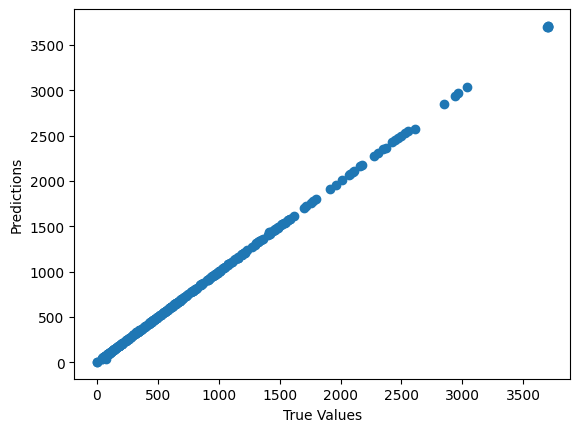

In [15]:
# visualise
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()